# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [4]:
Mobile = r"C:\Users\DELL\Downloads/project4.csv"
df = pd.read_csv(Mobile)
df.head(3)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"


# Exploratry Data Analysis

In [6]:
# check the missing value 
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [10]:
df.shape

(541, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [14]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


In [16]:
# Drop the unnecessary column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"


In [18]:
# check the duplicates values
df[df.duplicated()]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
27,vivo T2x 5G,Marine Blue,128,6,5000,50MP,8MP,0,16.71,Dimensity 6020,"13,999"
48,MOTOROLA e32,Arctic Blue,64,4,5000,50MP,8MP,0,16.51,Mediatek Helio G37,"7,999"
91,SAMSUNG Galaxy F14 5G,B.A.E. Purple,128,4,6000,50MP,13MP,0,16.76,"Exynos 1330, Octa Core","13,490"
132,SAMSUNG Galaxy F14 5G,OMG Black,128,6,6000,50MP,13MP,0,16.76,"Exynos 1330, Octa Core","14,490"
247,redmi min,M3),16,4,1000,0MP,0MP,0,4.57,Spreadtrum,920
344,Tecno Spark 9T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,290"
352,POCO X4 Pro 5G,Laser Black,128,8,5000,64MP,16MP,0,16.94,Qualcomm Snapdragon 695 5G,"19,499"
424,realme C30s,Stripe Black,64,4,5000,8MP,5MP,0,16.51,Unisoc SC9863A/ Unisoc SC9863A1,"8,499"
437,vivo Y100 5G,Pacific Blue,128,8,4500,64MP,16MP,0,16.21,Mediatek Dimensity 900,"23,999"
480,POCO C31,Royal Blue,64,4,5000,13MP,5MP,0,16.59,MediaTek G35,"8,999"


In [20]:
df.drop_duplicates(inplace=True)
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [22]:
#Processing the column Rear Camera & Front Camera.
df['Rear Camera']=df['Rear Camera'].str.replace('MP','')
df['Front Camera'] = df['Front Camera'].str.replace('MP','')

In [24]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,"8,999"


In [26]:
# convert that datatype from object to int(numerical)
df['Rear Camera']=df['Rear Camera'].astype('int64')
df['Front Camera']=df['Front Camera'].astype('int64')

In [28]:
df['Prize'] = df['Prize'].str.replace(',','').astype('Int64')

In [30]:
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          531 non-null    object 
 1   Colour         531 non-null    object 
 2   Memory         531 non-null    int64  
 3   RAM            531 non-null    int64  
 4   Battery_       531 non-null    int64  
 5   Rear Camera    531 non-null    int64  
 6   Front Camera   531 non-null    int64  
 7   AI Lens        531 non-null    int64  
 8   Mobile Height  531 non-null    float64
 9   Processor_     531 non-null    object 
 10  Prize          531 non-null    Int64  
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 50.3+ KB


#### Processing the column at Processor_ and creat another columns Processor_brand.

In [35]:
df['Processor_brand']= df["Processor_"].apply(lambda x :" ".join(x.split()[0:2]))
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_brand
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Unisoc Spreadtrum
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Unisoc Spreadtrum
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999,Qualcomm Snapdragon


In [37]:
df = df.loc[:, ~df.columns.str.contains('^Processor_')]
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,8999


In [39]:
df.describe()

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.0
mean,110.915254,5.401130,4873.877589,46.227872,12.045198,0.064030,16.450019,16305.775895
std,60.872883,1.991283,765.883129,31.392146,9.105142,0.245037,2.494246,10847.038354
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.0
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9368.0
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13999.0
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19338.5
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.0


In [41]:
# change in number 
numeric_df = df.select_dtypes(include=['number'])

In [43]:
numeric_df.corr()

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
Memory,1.000000,0.624728,-0.070355,0.527890,0.493396,-0.096529,0.050946,0.563535
RAM,0.624728,1.000000,-0.112560,0.437132,0.491954,-0.083673,0.089294,0.529474
Battery_,-0.070355,-0.112560,1.000000,0.191132,0.021995,0.153704,0.684077,-0.046250
Rear Camera,0.527890,0.437132,0.191132,1.000000,0.502209,-0.044825,0.232984,0.406784
Front Camera,0.493396,0.491954,0.021995,0.502209,1.000000,-0.113775,0.201570,0.529013
AI Lens,-0.096529,-0.083673,0.153704,-0.044825,-0.113775,1.000000,0.051182,-0.156336
Mobile Height,0.050946,0.089294,0.684077,0.232984,0.201570,0.051182,1.000000,0.168303
Prize,0.563535,0.529474,-0.046250,0.406784,0.529013,-0.156336,0.168303,1.000000


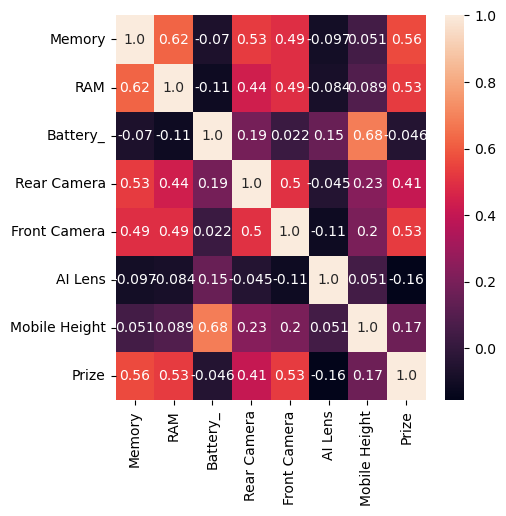

In [45]:
# presenting with heatmap
plt.figure(figsize=(5,5))
sns.heatmap(numeric_df.corr(),annot=True,fmt='.2')
plt.show()

#  Data Visualization

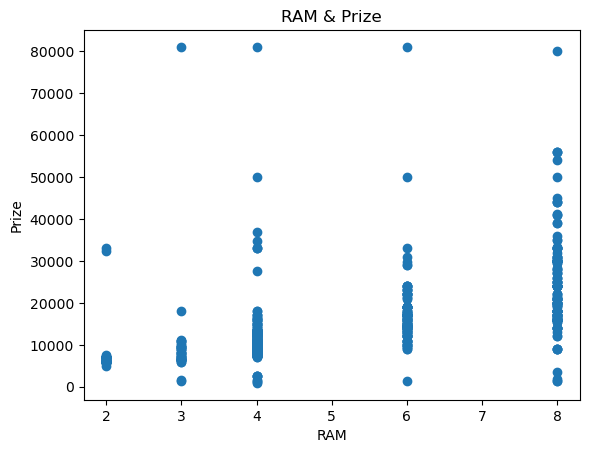

In [47]:
# Scatter plot of RAM Vs PRIZE
plt.scatter(df['RAM'],df['Prize'])
plt.xlabel('RAM')
plt.ylabel('Prize')
plt.title('RAM & Prize')
plt.show()

Text(0.5, 1.0, 'Front Camera & Prize')

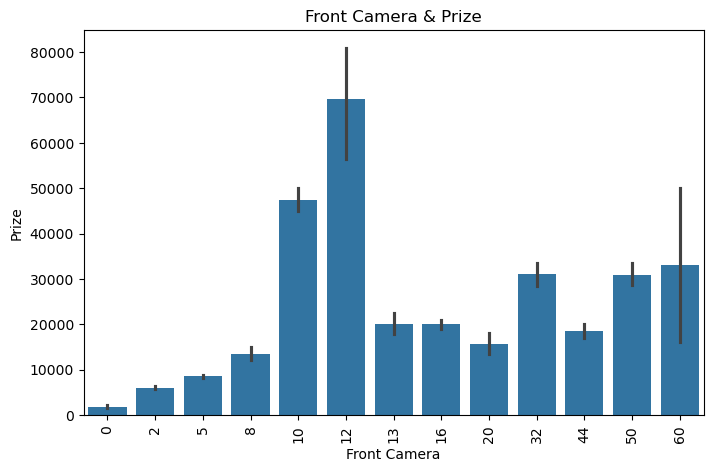

In [50]:
# Front camera Vs Prize
fig,ax=plt.subplots(figsize=(8,5))
plt.xticks(rotation='vertical')
sns.barplot(data=df,x='Front Camera',y='Prize',ax=ax)
plt.title('Front Camera & Prize')

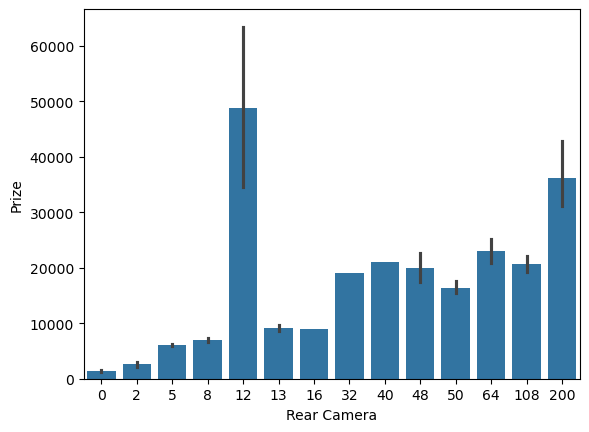

<Figure size 1200x800 with 0 Axes>

In [96]:
# Rear camera Vs Prize
sns.barplot(x=df['Rear Camera'],y=df['Prize'])
plt.xticks(rotation='horizontal')
plt.figure(figsize=(12,8))
plt.show()

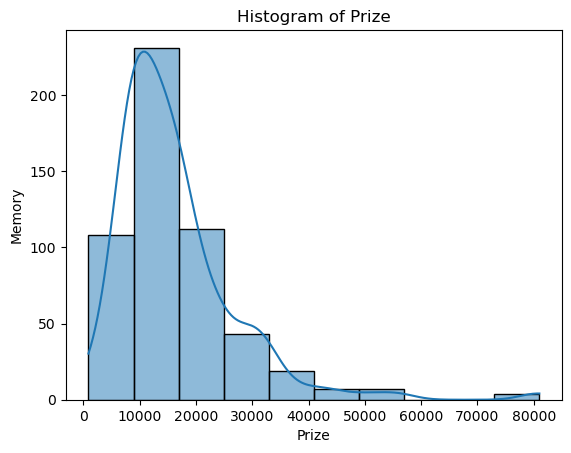

In [62]:
# By using histogram here we can see that the distribution of prize
variable=df['Prize']
sns.histplot(variable, bins=10, kde=True)
plt.title('Histogram of Prize')
plt.xlabel('Prize')
plt.ylabel('Memory')
plt.show()

<Axes: >

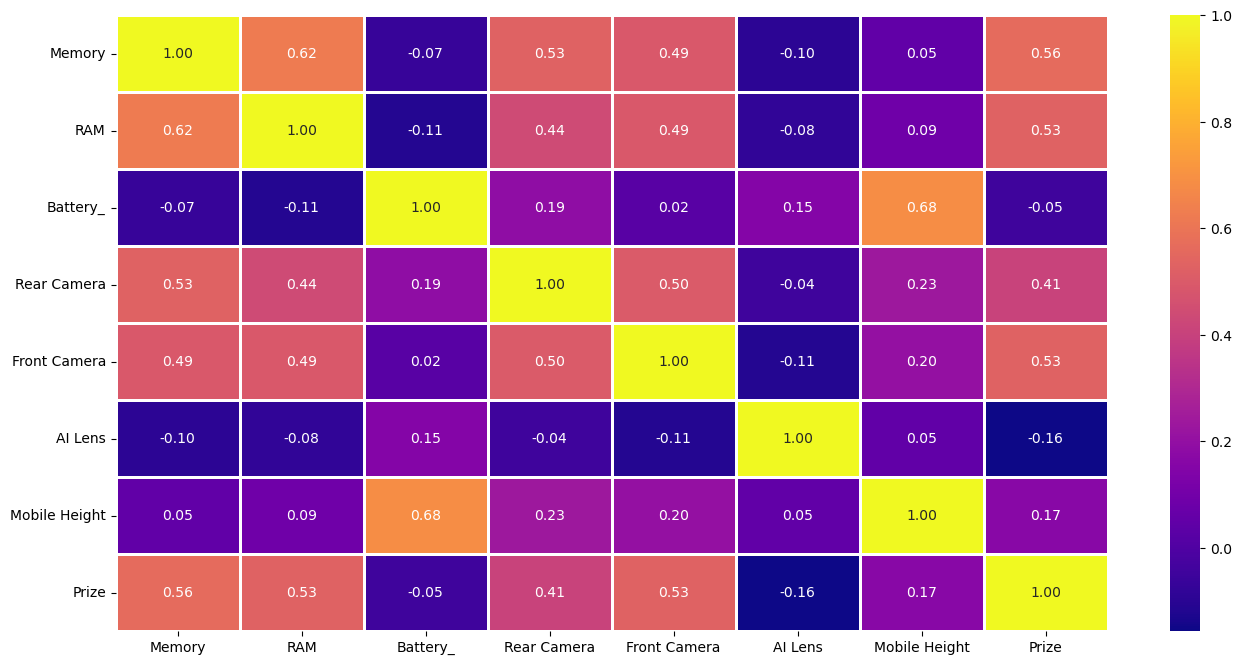

In [94]:
# Haetmap of dataset
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 8))
sns.heatmap(numerical_df.corr(),
            cmap ='plasma',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

Text(0.5, 1.0, 'RAM vs Memory')

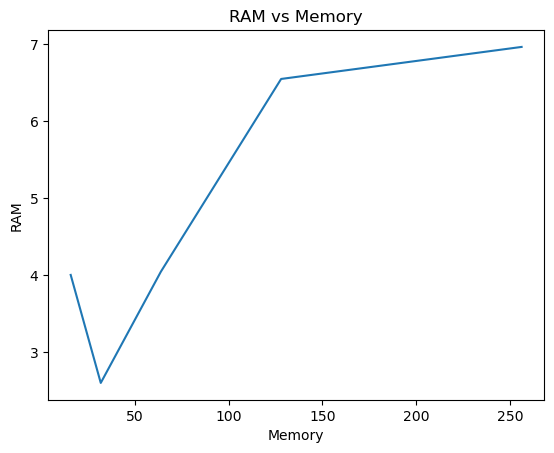

In [66]:
# check  relation between year the Memory & RAM
df.groupby('Memory')['RAM'].mean().plot()
plt.xlabel('Memory')
plt.ylabel('RAM')
plt.title("RAM vs Memory")

<Figure size 1000x1000 with 0 Axes>

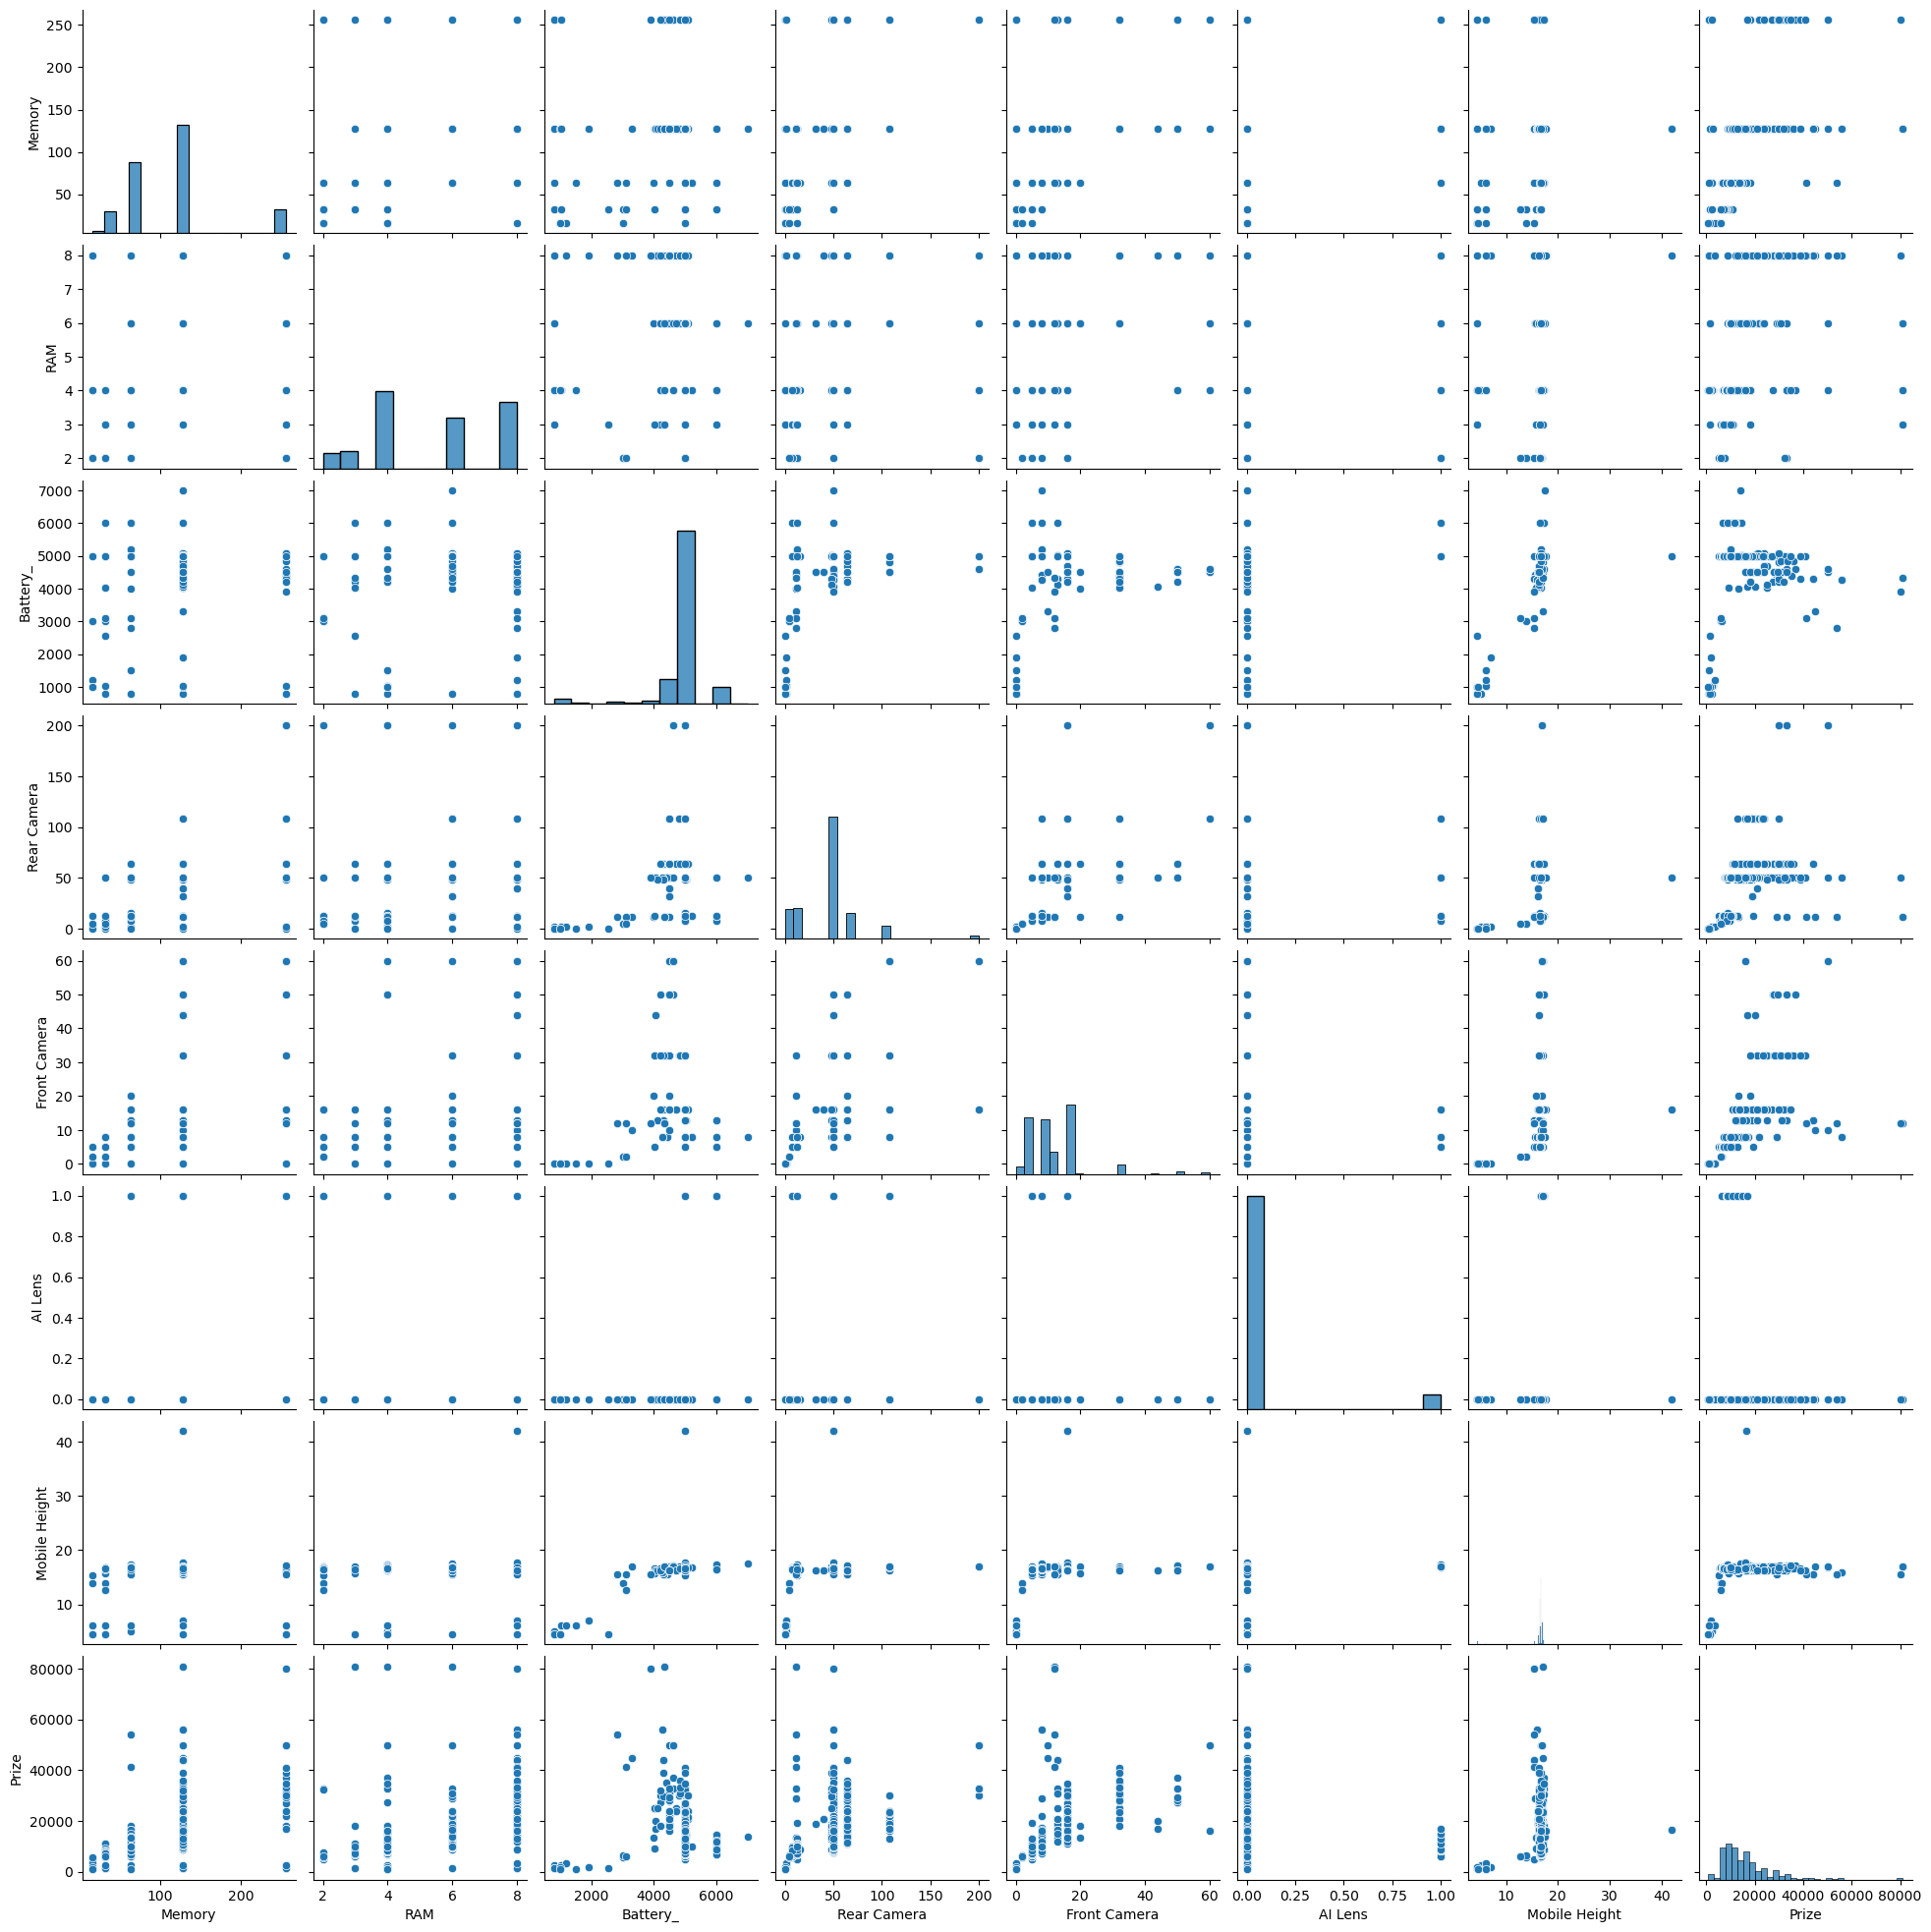

In [98]:
# pairplot of data
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

## Find Outliers and remove with the help of Quantile

In [ ]:
numeric_cols=df.select_dtypes(include=['number']).columns
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()i
print("Outliers Count Per Column:\n", outliers)

In [109]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,8999
...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,38999


<Figure size 3000x600 with 0 Axes>

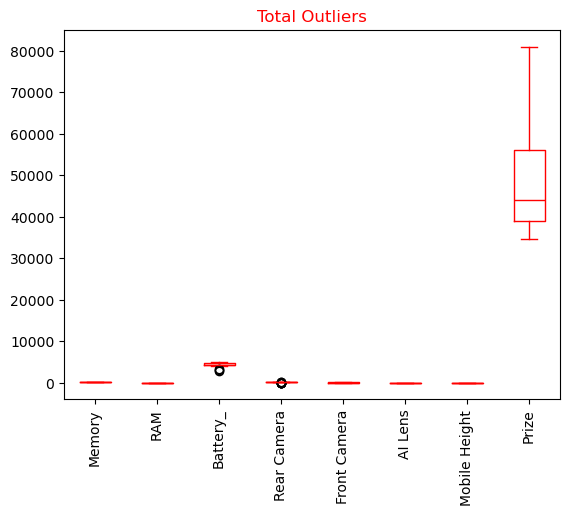

In [484]:
# show by graph
plt.figure(figsize = (15,3), dpi = 200)
outliers.plot(kind = 'box', color = 'red')
plt.xticks(rotation = 90)
plt.title('Total Outliers', color = 'red')
plt.show()

In [111]:
df.drop(outliers.index,inplace=True)
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,8999


# Model Building

### Using Linear Regression 

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [166]:
lbl_encode = LabelEncoder()
label_encoder = LabelEncoder()

In [168]:
encoder = LabelEncoder()

In [170]:
encoder.fit(df['Model'])

LabelEncoder()

In [172]:
df['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [178]:
lbl_encode = LabelEncoder()
label_encoder = LabelEncoder()

In [180]:
lbl_encode.fit_transform(df['Model'])

array([ 18,  18,  30,  62,   7,   7,   7,   7,   7,   7,  76,   7,  18,
       104, 103,  63,   7,  63,  62,  33, 161, 161, 161, 161, 161, 161,
       161,  22,  83,  83,  64,  83,  64,  64,  64, 104, 104,  37,  68,
        35,  76, 103,  30,  76, 104,  35,  37,  64, 160, 160,  32,  62,
       160, 160,  71,  32,  68, 104, 104,  71,  33, 140, 140, 105,  43,
       140, 136, 136, 136, 136,  74,  83,  69,  32,  62,  71,  79, 142,
       142, 142, 142, 142, 142, 142, 142, 142,  32, 105, 105,  76,  79,
        43,  71, 124, 124,  46,  71,  71,  70, 124, 124, 124, 124,  62,
       146, 119,  17,  17,  74, 105, 106,  76, 105, 117,  29, 118,  68,
        68,  76,  22,  22,  22, 145,  12,  74, 123, 127, 105,  83,  45,
       145,   0,   0,  83,   5,  12, 143, 143, 123,  90,   5,  91,  91,
        91,  12,  91,  91,   5, 120, 107,  29, 119, 120,  79,  79,  84,
        36,  81,  90, 106,  40, 135,  75, 127, 123,  33, 106,  67,  21,
        21,  21,  75,  91,  90,  11, 138, 138, 117, 121,  49, 12

In [186]:
df['Model'] = label_encoder.fit_transform(df['Model'])

In [188]:
df['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

In [190]:
lbl_encode.fit_transform(df['Colour'])

array([152,  19, 142, 192, 124,  85, 144,  62,  62, 144, 200,  85,  68,
       253, 161, 192, 124, 178,  46,  45,  14, 125,  87, 125,  87,  87,
       125,  91,  24, 113, 178, 114,  39,  78,  39, 154, 154, 127,  39,
        65,  34, 106, 198, 235, 233,   6, 112, 178, 250, 155,  81, 192,
       155, 250, 259, 141, 178, 253, 233, 178,  47, 196,   3,  83, 139,
       153,  23, 109,  61,  61, 258, 113, 259, 141, 192, 101,  76, 238,
       190, 238, 189, 190, 189, 238, 189, 190,  81,  21,  21,  34, 172,
       118, 101,  55, 149, 149, 178, 259, 259,  97,  55, 149,  97,  46,
        26,  26,  77, 207, 239,  83,   3, 167, 157, 157,  64,  64, 259,
       259, 138, 103, 202, 107, 188,   2, 108, 193, 210, 157, 114, 157,
       187,  35,  36,  24,  27, 133, 224, 168,  38, 234, 211,  82, 126,
       147,  77, 126, 147, 186, 186,  53, 150, 150, 150,  76, 172, 223,
        33,  43,  98,  42,  11, 255,  96, 212,  38,  45,  78, 259,  77,
         4, 164,   8,  82, 120,  27,  54, 116, 116, 116, 109,  2

In [192]:
df['Colour'] = label_encoder.fit_transform(df['Colour'])

In [194]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
0,18,152,64,4,6000,13,5,1,16.76,7299
1,18,19,64,4,6000,13,5,1,16.76,7299
2,30,142,128,8,5000,50,16,0,16.64,11999
3,62,192,32,2,5000,8,5,0,16.56,5649
4,7,124,128,8,5000,50,5,1,16.76,8999
...,...,...,...,...,...,...,...,...,...,...
534,48,93,64,4,5000,50,8,0,16.55,9790
535,97,113,64,3,5000,13,5,0,16.51,9999
537,27,49,32,2,3100,5,2,0,12.70,5998
538,112,245,64,4,5000,50,8,0,16.76,9990


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 540
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          506 non-null    int64  
 1   Colour         506 non-null    int32  
 2   Memory         506 non-null    int64  
 3   RAM            506 non-null    int64  
 4   Battery_       506 non-null    int64  
 5   Rear Camera    506 non-null    int64  
 6   Front Camera   506 non-null    int64  
 7   AI Lens        506 non-null    int64  
 8   Mobile Height  506 non-null    float64
 9   Prize          506 non-null    Int64  
dtypes: Int64(1), float64(1), int32(1), int64(7)
memory usage: 42.0 KB


# Fearture Selection

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix

In [287]:
x = df[['Model','Colour','Memory','RAM','AI Lens','Rear Camera','Front Camera']]
y = df.Prize

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier

In [500]:
dtmodel = DecisionTreeClassifier()

In [502]:
dtmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [504]:
dtmodel.score(x_train, y_train)

0.9925742574257426

In [506]:
dtmodel.score(x_test, y_test)

0.5

In [519]:
dt_pred = dtmodel.predict(x_test)

# LinearRegression

In [522]:
linearmodel = LinearRegression()

In [524]:
linearmodel.fit(x_train, y_train)

LinearRegression()

In [526]:
linearmodel.score(x_test, y_test)

0.638293248540331

In [528]:
linearmodel.score(x_train, y_train)

0.7165822120040324

In [530]:
classification_report(y_test, dt_pred)

'              precision    recall  f1-score   support\n\n      4999.0       0.00      0.00      0.00         0\n      5649.0       0.00      0.00      0.00         1\n      5999.0       0.00      0.00      0.00         2\n      6299.0       0.00      0.00      0.00         0\n      6499.0       0.50      1.00      0.67         1\n      6799.0       1.00      1.00      1.00         1\n      6960.0       0.00      0.00      0.00         1\n      6999.0       1.00      1.00      1.00         2\n      7049.0       0.00      0.00      0.00         0\n      7115.0       0.00      0.00      0.00         0\n      7245.0       0.00      0.00      0.00         1\n      7299.0       0.50      1.00      0.67         1\n      7499.0       0.00      0.00      0.00         0\n      7749.0       1.00      1.00      1.00         2\n      7999.0       1.00      1.00      1.00         3\n      8049.0       0.00      0.00      0.00         1\n      8288.0       0.00      0.00      0.00         0\n      8

In [532]:
confusion_matrix(y_test, dt_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [534]:
dtmodel.feature_importances_

array([0.45236787, 0.17844401, 0.05831538, 0.09944621, 0.02306137,
       0.10635651, 0.08200866])

In [536]:
pd.DataFrame(index = x.columns, data = dtmodel.feature_importances_,
            columns = ['Feature Importance']).sort_values('Feature Importance', ascending= False)[:10]

,Feature Importance
Model,0.452368
Colour,0.178444
Rear Camera,0.106357
RAM,0.099446
Front Camera,0.082009
Memory,0.058315
AI Lens,0.023061


# RandomForestsRegressor

In [539]:
rfr = RandomForestRegressor(n_estimators=15, random_state=42)

In [541]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [543]:
rfr.score(x_test, y_test)

0.7040911484586635

In [545]:
rfr.score(x_train, y_train)

0.9771711078892699

In [547]:
rfr_pred=rfr.predict(x_test)

In [549]:
rfr.feature_importances_

array([9.41346112e-02, 6.30878197e-02, 7.91950965e-02, 8.71640942e-02,
       2.47532836e-04, 1.15739013e-01, 5.60431833e-01])

In [551]:
linear_pred = linearmodel.predict(x_test)

# Model Evaluation

In [554]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [556]:
mean_absolute_error(y_test, linear_pred)

2952.0113205582193

In [558]:
mean_squared_error(y_test, linear_pred)

18867616.302319422

In [560]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test, linear_pred))

4343.686948010805

In [562]:
r2_score(y_test, linear_pred)

0.638293248540331

In [564]:
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

rfr = RandomForestRegressor()
rfr.fit(x_train_pca, y_train)

RandomForestRegressor()

In [565]:
accuracy = rfr.score(x_test_pca, y_test)
accuracy

0.574614727575375

# Model loading and final testing

In [569]:
final_model = RandomForestRegressor(n_estimators=15, random_state=42)

In [571]:
final_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [573]:
from joblib import dump, load

In [575]:
dump(final_model, 'final_price_model.joblib')

['final_price_model.joblib']

In [577]:
loaded_model = load('final_price_model.joblib')

### Putting some values in all the features for testing the results

In [580]:
input_features = x.head(4)

In [582]:
predicted_price = loaded_model.predict(input_features.round(decimals=0))
predicted_price

array([ 7812.33333333,  7472.33333333, 15265.66666667,  6230.83333333])

In [448]:
actual_price = y.head(4)
actual_price

0     7299
1     7299
2    11999
3     5649
Name: Prize, dtype: Int64

In [450]:
pd.DataFrame({'acutal_price': actual_price, 'predicted_price': predicted_price})

,acutal_price,predicted_price
0,7299,7812.333333
1,7299,7472.333333
2,11999,15265.666667
3,5649,6230.833333


# Feature Importance Analysis

Text(0.5, 1.0, 'PointPlot for Actual and Predicted price')

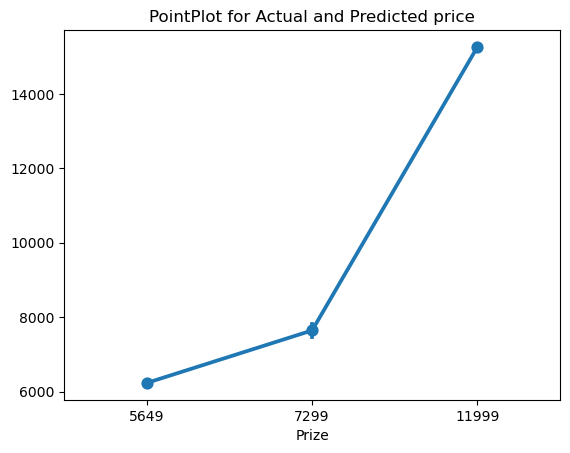

In [492]:
# show by graph
sns.pointplot(x=actual_price, y = predicted_price)
plt.title('PointPlot for Actual and Predicted price')

In [494]:
x.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'AI Lens', 'Rear Camera',
       'Front Camera'],
      dtype='object')

In [496]:
coeff_analysis = pd.DataFrame(linearmodel.coef_, x.columns, columns = ['Coeff'])

In [498]:
coeff_analysis.sort_values('Coeff', ascending = False)[:10]

,Coeff
RAM,778.653100
Front Camera,280.654023
Rear Camera,57.734338
Memory,32.178564
Model,9.239529
Colour,0.514584
AI Lens,-1761.305797
